# Scatter density vs. violin plot

This gives several examples to compare the dot density vs. violin plot options for the summary_plot:

In [1]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs() 

# train LightGBM model
X,y = shap.datasets.adult()
bst = xgboost.train({"learning_rate": 0.01, "objective": "binary:logistic"}, xgboost.DMatrix(X, label=y), 100)

# explain the model's prediction using SHAP values on the first 1000 training data samples
shap_values = bst.predict(xgboost.DMatrix(X), pred_contribs=True, approx_contribs=True)

## 50 samples

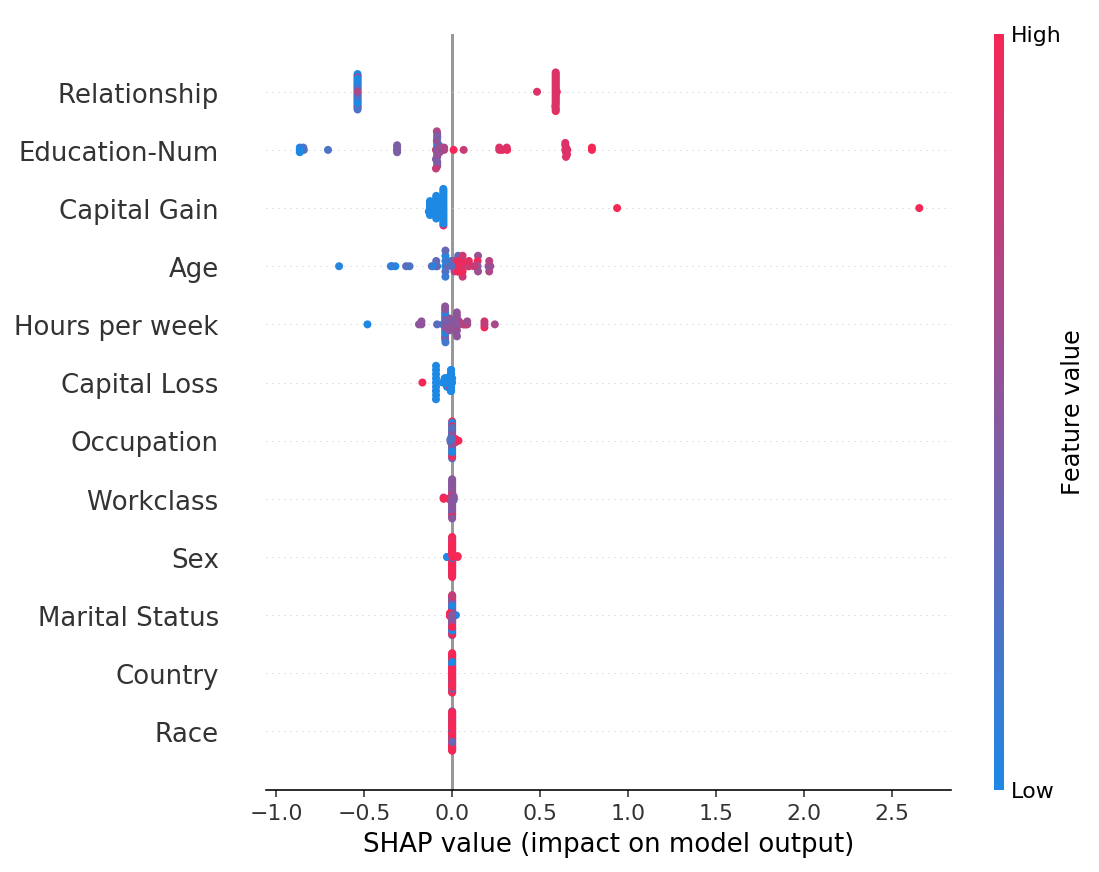

In [2]:
shap.summary_plot(shap_values[:50,:], X.iloc[:50,:])

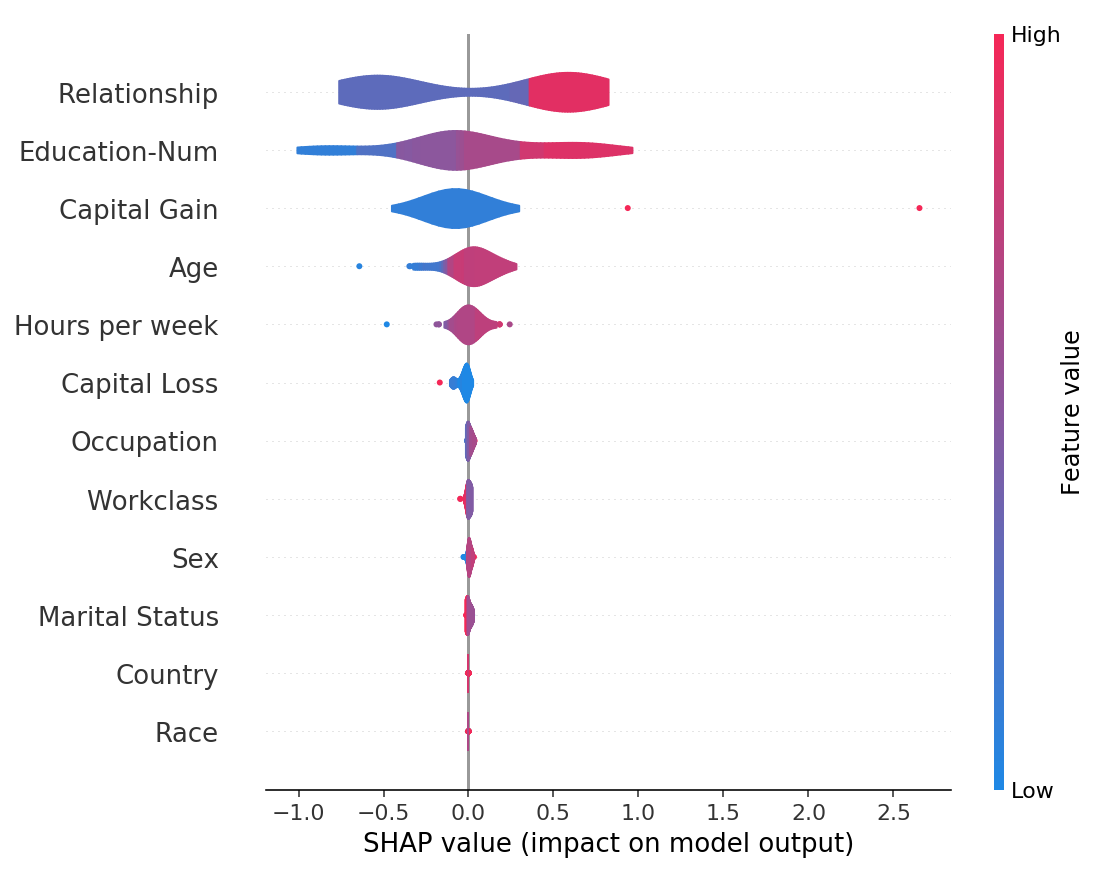

In [3]:
shap.summary_plot(shap_values[:50,:], X.iloc[:50,:], plot_type="violin")

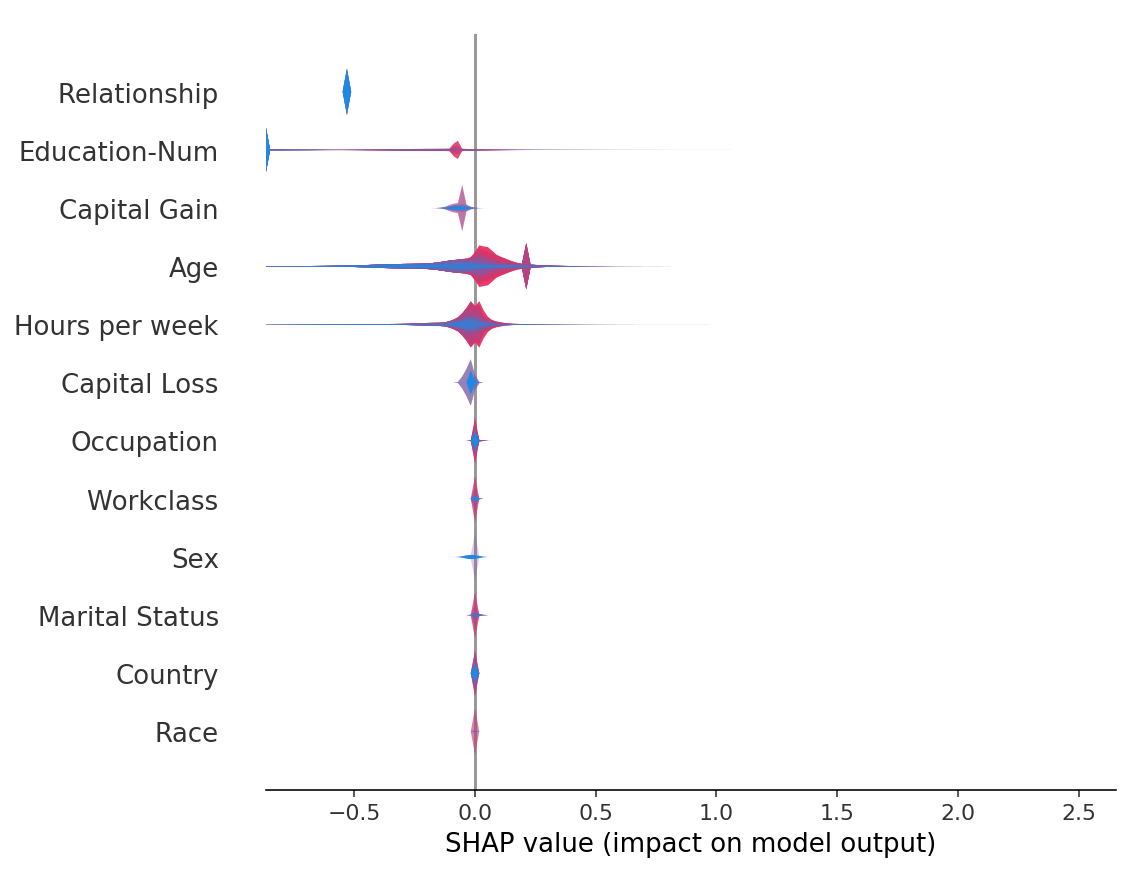

In [4]:
shap.summary_plot(shap_values[:50,:], X.iloc[:50,:], plot_type="layered_violin")

## 200 samples

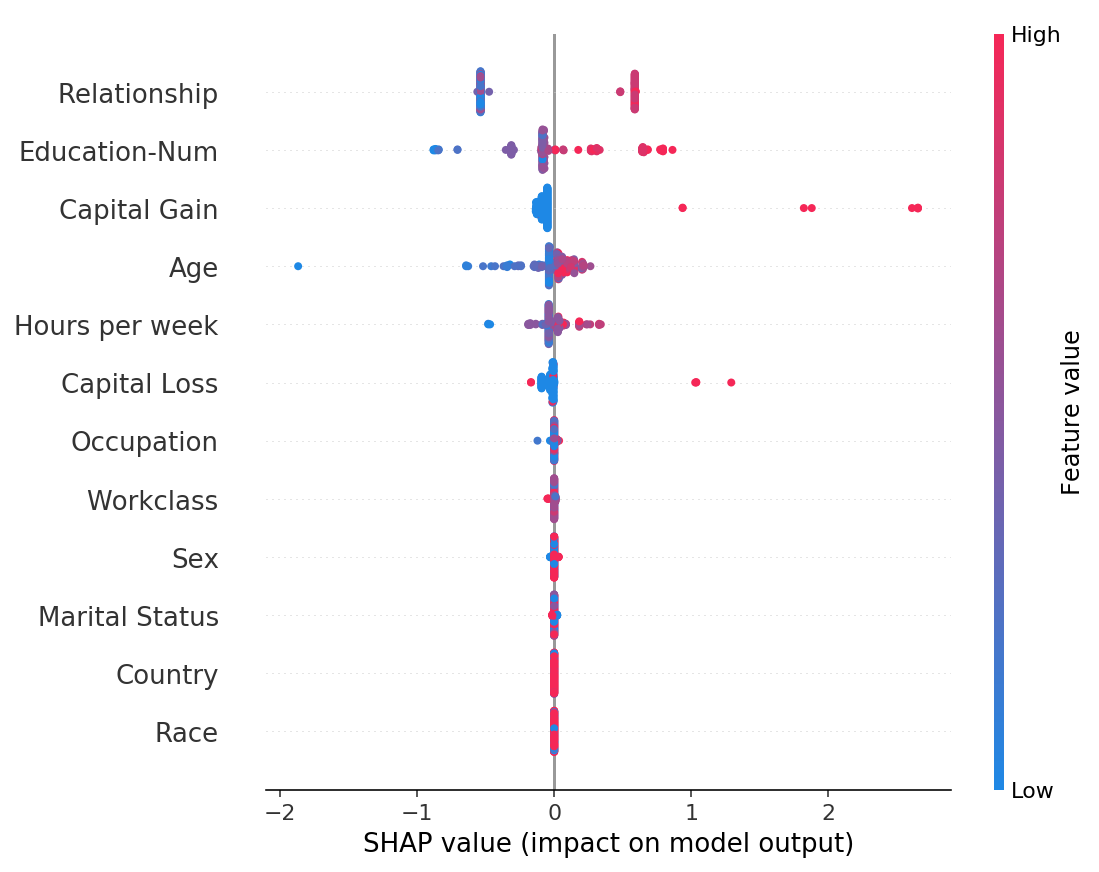

In [5]:
shap.summary_plot(shap_values[:200,:], X.iloc[:200,:])

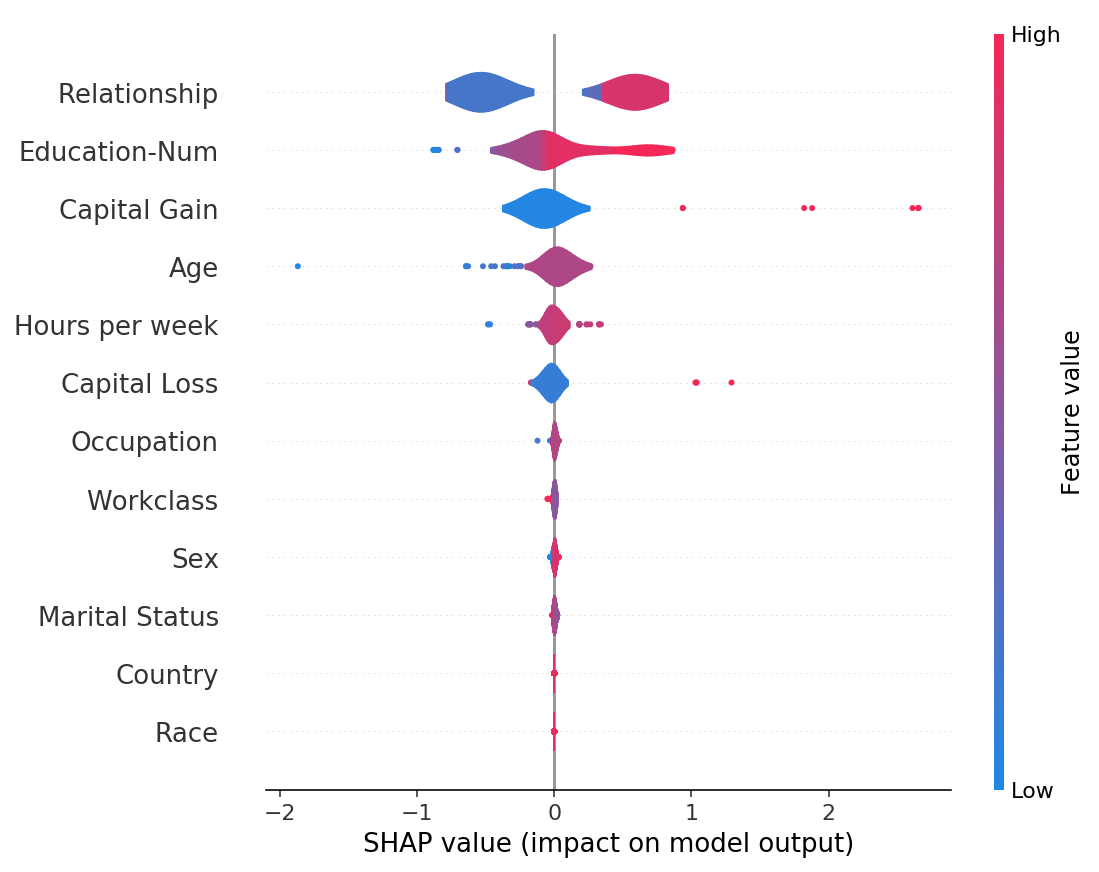

In [6]:
shap.summary_plot(shap_values[:200,:], X.iloc[:200,:], plot_type="violin")

## 1,000 samples

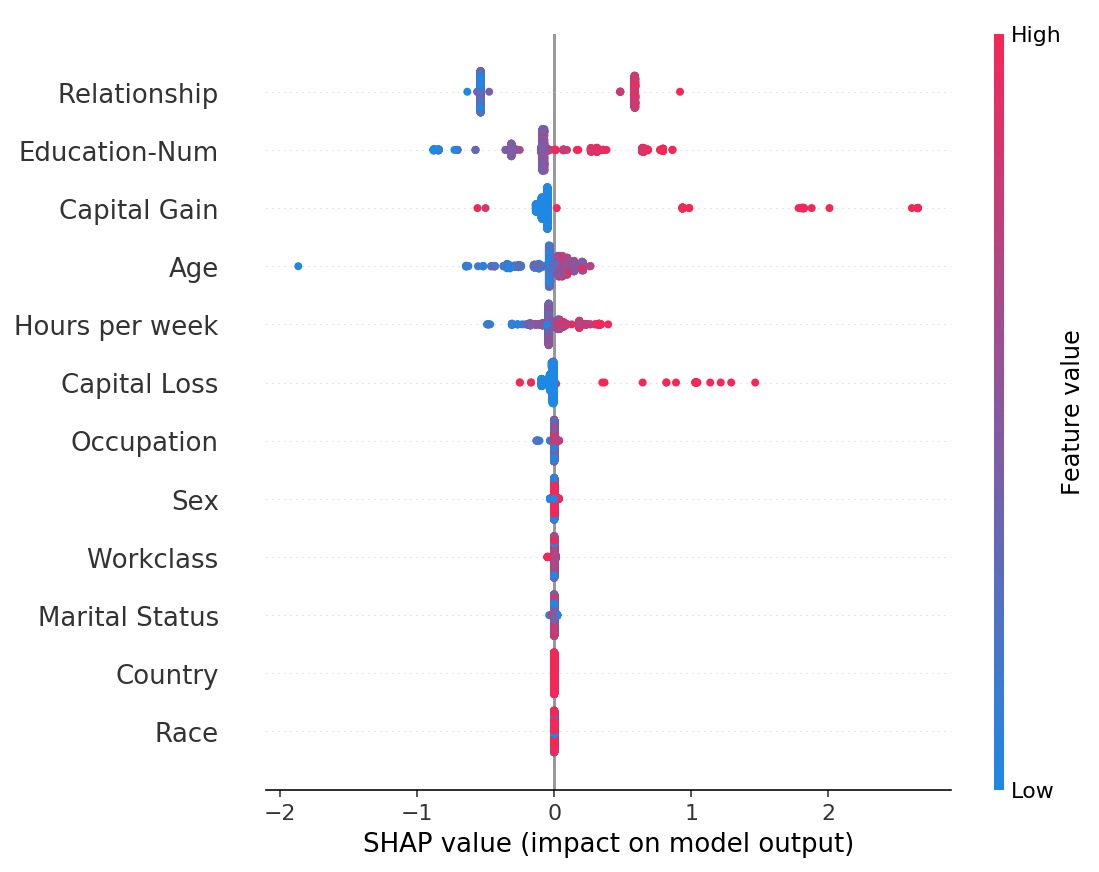

In [7]:
shap.summary_plot(shap_values[:1000,:], X.iloc[:1000,:])

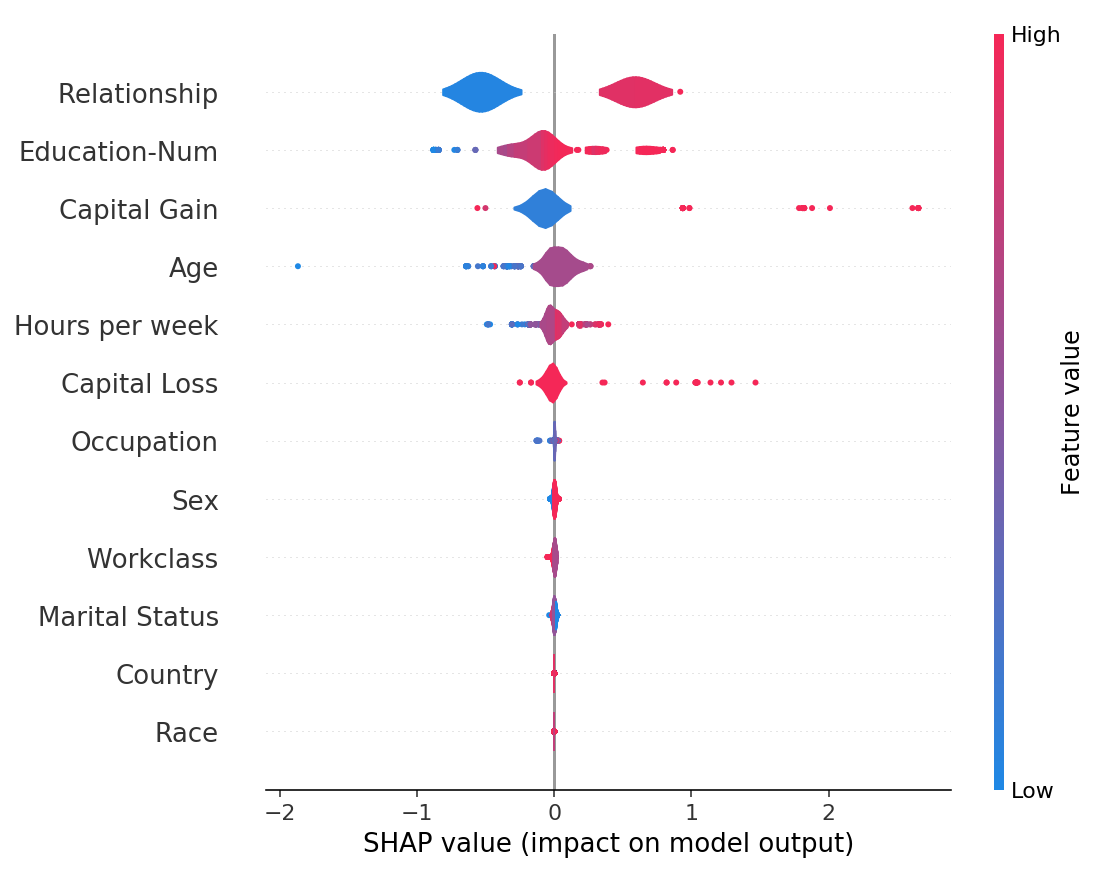

In [8]:
shap.summary_plot(shap_values[:1000,:], X.iloc[:1000,:], plot_type="violin")

## 10,000 samples

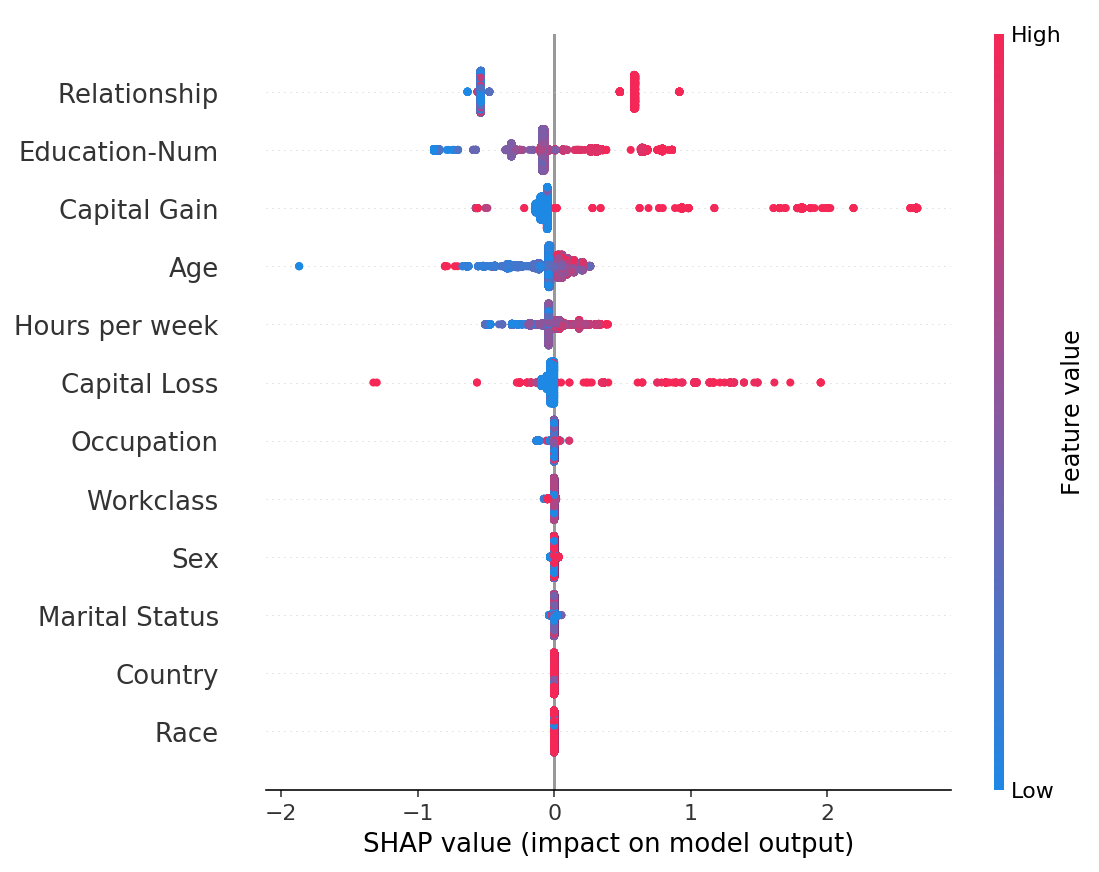

In [9]:
shap.summary_plot(shap_values[:10000,:], X.iloc[:10000,:])

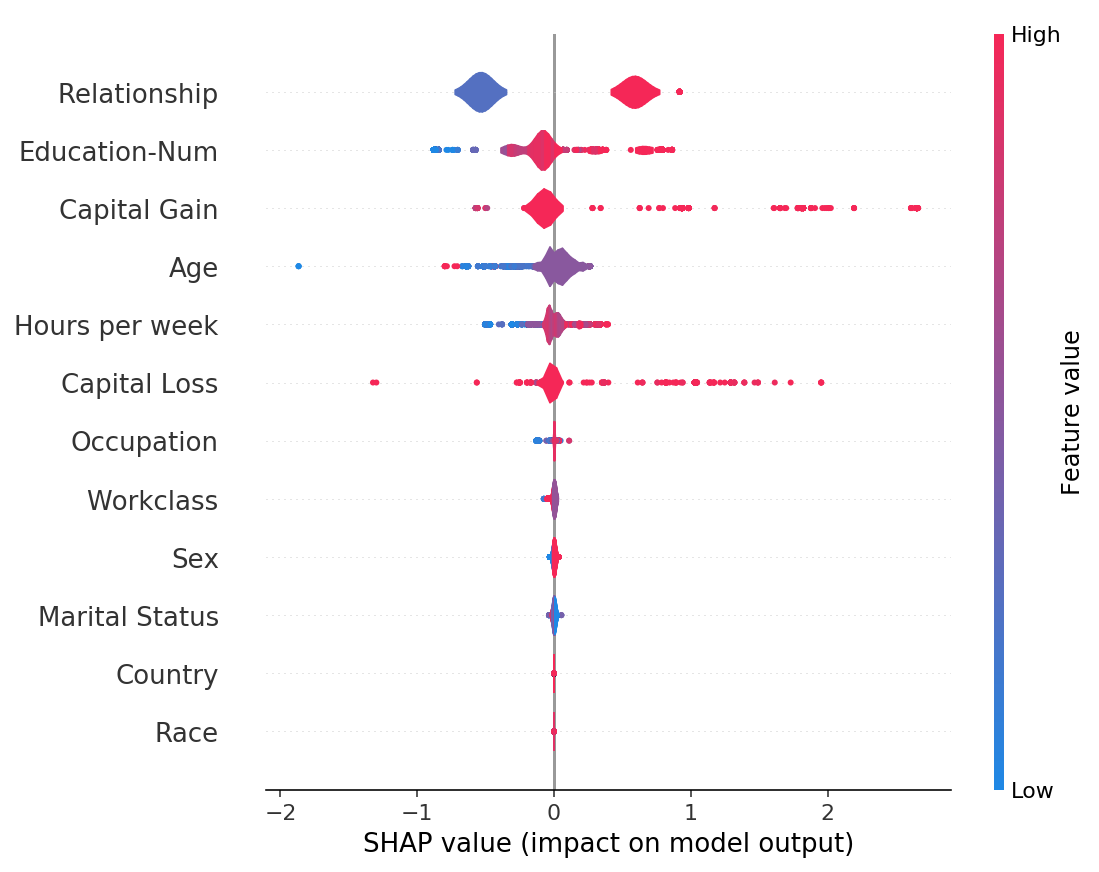

In [10]:
shap.summary_plot(shap_values[:10000,:], X.iloc[:10000,:], plot_type="violin")

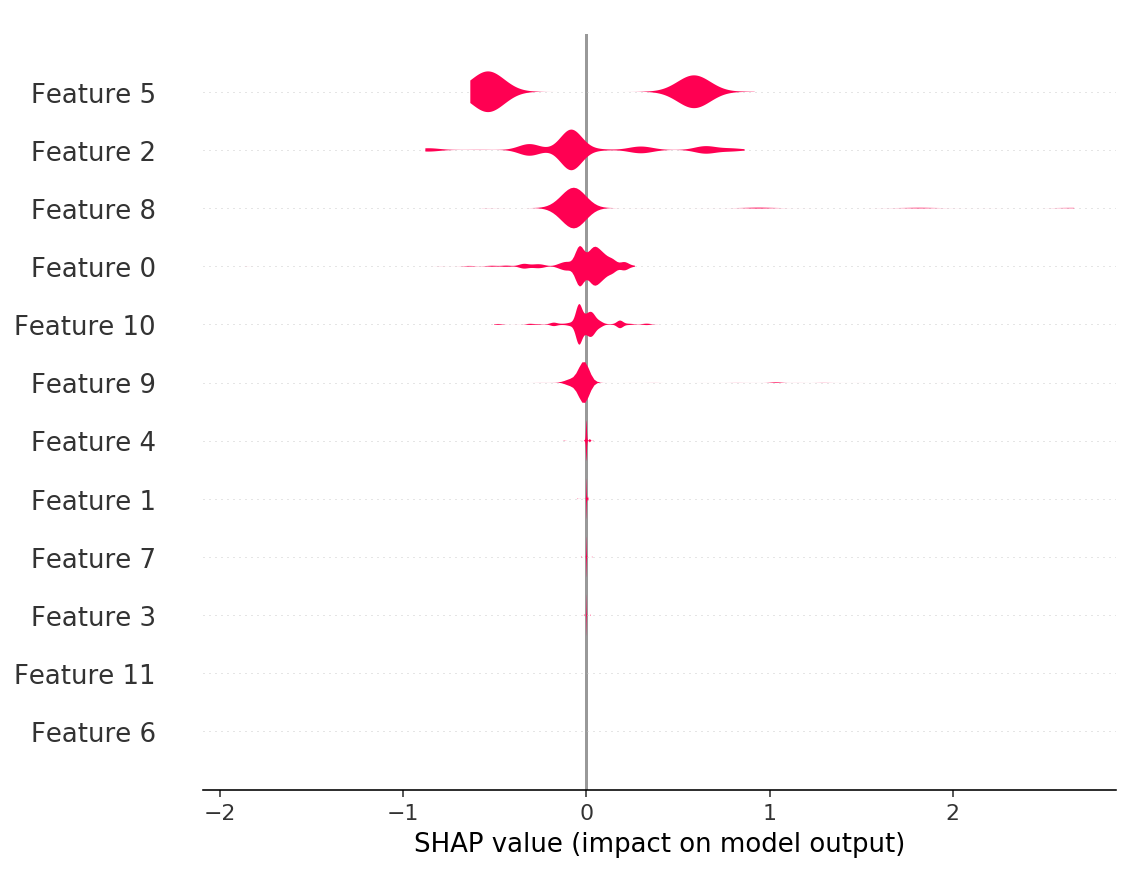

In [11]:
shap.summary_plot(shap_values[:10000,:], plot_type="violin")